# **Analisis Data Covid-19 Jakarta dan Indonesia**
*by Georhapsody | Submisi Data Science Academy Compfest 15*

# **Daftar Isi**

1.   [Pendahuluan](#Pendahuluan)
2.   [Rumusan Masalah](#Rumusan-Masalah)
3.   [Hipotesis](#Hipotesis)
4.   [Metodologi](#Metodologi)
5.   [Data Preparation](#Data-Preparation)
5.   [Data Profiling](#Data-Profiling)
7.   [Data Cleansing](#Data-Cleansing)
8.   [Feature Engineering](#Feature-Engineering)
9.   [Exploratory Data Analysis](#Exploratory-Data-Analysis)
10.  [Analisis Lanjutan](#Analisis-Lanjutan)
11.  [Kesimpulan dan Rekomendasi](#Kesimpulan-dan-Rekomendasi)

# **Pendahuluan**

Pandemi Covid-19 memberikan dampak yang besar pada berbagai lini kehidupan masyarakat. Untuk menangani pandemi ini, pemerintah di telah melakukan berbagai upaya, seperti membentuk gugus tugas dan memberlakukan PPKM Darurat di Pulau Jawa dan Bali pada Juli 2021.

Meski telah dilakukan berbagai upaya, kita telah banyak mendengar jumlah masyarakat yang terinfeksi dan meninggal akibat Covid-19 masih sangat banyak. Selain itu, perekonomian dan tingkat mobilitas masyarakat juga terkena dampak buruk kebijakan pemerintah terhadap pandemi. 

Apakah kebijakan yang diambil pemerintah untuk menekan pandemi telah tepat? Apa saja efek akibat kebijakan seperti PPKM Darurat terhadap angka Covid-19, perekonomian, atau tingkat mobilitas masyarakat? Apakah kebijakan PPKM Darurat diberlakukan terlambat atau tepat waktu? Diperlukan analisis terhadap data-data untuk menjawab persoalan tersebut.

# **Rumusan Masalah**
1. Bagaimana tren angka Covid-19 di DKI Jakarta?
2. Bagaimana tren angka Covid-19 nasional?
3. Bagaimana efektivitas kebijakan PPKM Darurat dalam menekan angka Covid-19?
4. Bagaimana efek kebijakan PPKM Darurat terhadap PDB nasional?
5. Bagaimana efek kebijakan PPKM Darurat terhadap tingkat mobilitas masyarakat?

# **Hipotesis**
1. Kebijakan PPKM Darurat efektif dan tepat waktu ditandai dengan menurunnya angka Covid-19 tidak lama setelah diberlakukan.
2. Kebijakan PPKM Darurat berdampak negatif terhadap pertumbuhan PDB nasional.
3. Kebijakan PPKM Darurat berdampak negatif pada tingkat mobilitas masyarakat.

# **Metodologi**

Sebelum dianalisis, dilakukan *preprocessing* data berupa *data preparation*, *data profiling*, dan *data cleansing*. Dalam menentukan hubungan antarvariabel serta menentukan pola dalam data, akan digunakan analisis statistik. Untuk menentukan pola serta prediksi pada, dibuat model regresi polinomial yang di-*fit* terhadap data. Agar akurasi model tinggi, dilakukan *feature engineering* pada data dan *hyperparameter tuning* model.

Variabel yang akan dianalisis adalah angka kasus Covid-19, tingkat mobilitas, dan angka PDB nasional sebagai dampak dari pemberlakuan PPKM Darurat oleh pemerintah.

# **Data Preparation**

Dalam analisis ini digunakan *dataset* Covid-19, PDB, serta mobilitas nasional. Data telah diproses terlebih dahulu, seperti konversi ke .csv dan koreksi format data, sebelum dianalisis.

Seluruh *dataset* kemudian dimuat ke dalam *dataframe*. Kemudian ubah kolom tanggal sebagai *index*.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import data Covid-19
df_covid_raw = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/raw-covid-data.csv",
                          na_values="nan", keep_default_na=False)

# Import data PDB Indonesia
df_PDB_raw = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/raw-PDB-data.csv")

# Import data mobility Indonesia 2020, 2021, dan 2022
mob_2020 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/2020_mobility_report.csv")
mob_2021 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/2021_mobility_report.csv")
mob_2022 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/2022_mobility_report.csv")
df_mobility_raw = pd.concat([mob_2020, mob_2021, mob_2022], axis=0)

In [4]:
# Set tahun-bulan sebagai index data PDB
df_PDB_raw = df_PDB_raw.set_index("tahun-bulan")

# Set tanggal sebagai index data mobility
df_mobility_raw = df_mobility_raw.set_index("date")

# **Data Profiling**

Dilakukan peninjauan *head* data, pengecekan tipe-tipe data, dan pengecekan *missing values*.

In [5]:
# Cetak 5 data Covid-19 paling atas
df_covid_raw.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,29/01/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01/03/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,02/03/2020,2,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
3,03/03/2020,2,2,0,0,1,0,0,2,3,...,0,0,0,0,1,0,0,2,3,2
4,04/03/2020,2,2,0,0,1,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0


Terdapat kesalahan format tanggal pada data Covid-19 yang harus diperbaiki.

In [6]:
# Cetak 5 data PDB paling atas
df_PDB_raw.head()

,PDB_harga_konstan,perubahan_harga_konstan,PDB_harga_berlaku,perubahan_harga_berlaku
tahun-bulan,,,,
2019-03,2625180.5,-0.52,3782618.3,-0.44
2019-06,2735414.1,4.20,3964074.7,4.80
2019-09,2818812.7,3.05,4067358.0,2.61
2019-12,2769748.1,-1.74,4018606.2,-1.20
2020-03,2703027.1,-2.41,3923347.9,-2.37


In [7]:
# Cetak 5 data mobility paling atas
df_mobility_raw.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,
2020-02-15,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-2.0,-2.0,-8.0,1.0,5,1
2020-02-16,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-3.0,-3.0,-7.0,-4.0,2,2
2020-02-17,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-3.0,-4.0,-7.0,-1.0,3,1
2020-02-18,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-3.0,-2.0,-4.0,1.0,2,1
2020-02-19,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-3.0,-4.0,-3.0,0.0,1,1


Terdapat *missing values* untuk beberapa kolom data *mobility* karena beberapa data tersebut adalah agregat nasional, sehingga kolom seperti sub_region_1 (provinsi) bernilai *null*. 

In [8]:
# Cek datatypes data PDB
print("Datatypes data PDB")
print(df_PDB_raw.dtypes)

# Cek missing values data PDB
print("\nMissing values data PDB")
print(df_PDB_raw.isna().sum())

Datatypes data PDB
PDB_harga_konstan          float64
perubahan_harga_konstan    float64
PDB_harga_berlaku          float64
perubahan_harga_berlaku    float64
dtype: object

Missing values data PDB
PDB_harga_konstan          0
perubahan_harga_konstan    0
PDB_harga_berlaku          0
perubahan_harga_berlaku    0
dtype: int64


In [9]:
# Cek datatypes data mobility
print("Datatypes data mobility")
print(df_mobility_raw.dtypes)

# Cek missing values data Covid
print("\nMissing values data mobility")
print(df_mobility_raw.isna().sum())

Datatypes data mobility
country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                          float64
metro_area                                            float64
iso_3166_2_code                                        object
census_fips_code                                      float64
place_id                                               object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline                 int64
residential_percent_change_from_baseline                int64
dtype: object

Missing values data mobility
country_region_code                                       0
coun

# **Data Cleansing**

Terdapat format data Covid-19 yang salah karena terdapat koma pada angka dan banyak data yang terbaca sebagai *string*, sehingga koma tersebut harus dihapus kemudian diubah menjadi *integer*. Kemudian, *missing value* pada data tersebut perlu diisi dengan nilai mediannya. 

In [10]:
# Hapus koma pada data dan konversi data Covid-19 ke integer
df_covid_raw = df_covid_raw.astype(str)
df_covid_raw = df_covid_raw.apply(lambda x: x.str.replace(',', ''))
df_covid_raw = df_covid_raw.apply(pd.to_numeric, errors='ignore')

In [11]:
# Isi missing value dengan rata-rata
df_covid_raw = df_covid_raw.dropna()
print("Missing values pada data:")
print(df_covid_raw.isna().sum())

Missing values pada data:
Tanggal                            0
Positif (Indonesia)                0
Dirawat (Indonesia)                0
Sembuh (Indonesia)                 0
Meninggal (Indonesia)              0
Meninggal (Jakarta)                0
Sembuh (Jakarta)                   0
Self-Isolation (Jakarta)           0
Dirawat (Jakarta)                  0
Positif (Jakarta)                  0
Positif Aktif (Jakarta)            0
Positif Harian (Indonesia)         0
Dirawat Harian (Indonesia)         0
Sembuh Harian (Indonesia)          0
Meninggal Harian (Indonesia)       0
Meninggal Harian (Jakarta)         0
Sembuh Harian (Jakarta)            0
Self-Isolation Harian (Jakarta)    0
Dirawat Harian (Jakarta)           0
Positif Harian (Jakarta)           0
Positif Aktif Harian (Jakarta)     0
dtype: int64


Lalu, pisahkan kolom data Covid-19 Jakarta dan nasional ke dalam *dataframe* terpisah. Hapus akhiran *(Jakarta)* dan *(Indonesia)* untuk masing-masing *dataframe* serta ganti nama kolom positif harian ke positif_baru. *Drop* kolom self-isolation dan dirawat pada data Jakarta dan kolom dirawat pada data nasional karena tidak dibutuhkan.

In [12]:
# Inisiasi dataframe Covid-19 Jakarta
df_covid_jakarta = df_covid_raw.drop(columns=[item for item in df_covid_raw.columns if "Indonesia" in item])
df_covid_jakarta.columns = df_covid_jakarta.columns.str.lower()

# Hapus akhiran "(jakarta)" dari nama kolom
df_covid_jakarta.columns = [col.replace(" (jakarta)", "") for col in df_covid_jakarta.columns]

# Drop kolom berakhiran "Harian"
df_covid_jakarta = df_covid_jakarta.drop(columns=[item for item in df_covid_jakarta.columns if "harian" in item])

# Rename kolom "posisi aktif"
df_covid_jakarta =  df_covid_jakarta.rename(columns={"positif aktif":"positif_aktif"})

# Drop kolom self-isolation & dirawat
df_covid_jakarta = df_covid_jakarta.drop(columns=["self-isolation", "dirawat"])

In [13]:
# Inisiasi dataframe Covid-19 Nasional
df_covid_nasional = df_covid_raw.drop(columns=[item for item in df_covid_raw.columns if "Jakarta" in item])
df_covid_nasional.columns = df_covid_nasional.columns.str.lower()

# Hapus akhiran "(Indonesia)" dari nama kolom
df_covid_nasional.columns = [col.replace(" (indonesia)", "") for col in df_covid_nasional.columns]

# Drop kolom berakhiran "harian"
df_covid_nasional = df_covid_nasional.drop(columns=[item for item in df_covid_nasional.columns if "harian" in item])

# Rename kolom "posisi aktif"
df_covid_nasional =  df_covid_nasional.rename(columns={"positif aktif":"positif_aktif"})

# Drop kolom "dirawat"
df_covid_nasional = df_covid_nasional.drop(columns=["dirawat"])

Ubah format tanggal keduanya menjadi tahun-bulan-hari, kemudian *set* tanggal sebagai *index*.

In [14]:
# Ubah format tanggal data Jakarta ke tahun-bulan-hari 
for row in df_covid_jakarta.index:
    year = df_covid_jakarta.iloc[row, 0][6:10]
    month = df_covid_jakarta.iloc[row, 0][3:5]
    day = df_covid_jakarta.iloc[row, 0][0:2]
    df_covid_jakarta.iloc[row, 0]=year+"-"+month+"-"+day

df_covid_jakarta = df_covid_jakarta.set_index("tanggal")
df_covid_jakarta.head()

,meninggal,sembuh,positif,positif_aktif
tanggal,,,,
2020-01-29,0,0,0,0
2020-03-01,0,0,0,0
2020-03-02,0,0,0,0
2020-03-03,1,0,3,2
2020-03-04,1,0,3,2


In [15]:
# Ubah format tanggal data nasional ke tahun-bulan-hari 
for row in df_covid_nasional.index:
    year = df_covid_nasional.iloc[row, 0][6:10]
    month = df_covid_nasional.iloc[row, 0][3:5]
    day = df_covid_nasional.iloc[row, 0][0:2]
    df_covid_nasional.iloc[row, 0]=year+"-"+month+"-"+day

df_covid_nasional = df_covid_nasional.set_index("tanggal")
df_covid_nasional.head()

,positif,sembuh,meninggal
tanggal,,,
2020-01-29,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0
2020-03-02,2.0,0.0,0.0
2020-03-03,2.0,0.0,0.0
2020-03-04,2.0,0.0,0.0


Tambahkan kolom rasio_kematian (jumlah pasien meninggal/total pasien), rasio_sembuh(jumlah pasien sembuh/total pasien), dan rasio_sembuh_meninggal (jumlah pasien sembuh/jumlah pasien meninggal) pada kedua *dataframe* Covid-19.

In [16]:
# Data Covid-19 Jakarta
# Tambahkan kolom rasio_kematian
df_covid_jakarta["rasio_kematian"] = df_covid_jakarta["meninggal"]/df_covid_jakarta["positif"]
df_covid_jakarta.fillna(0, inplace=True)

# Tambahkan kolom rasio_sembuh
df_covid_jakarta["rasio_sembuh"] = df_covid_jakarta["sembuh"]/df_covid_jakarta["positif"]
df_covid_jakarta.fillna(0, inplace=True)

# Tambahkan kolom rasio_sembuh_meninggal
df_covid_jakarta["rasio_sembuh_meninggal"] = df_covid_jakarta["sembuh"]/df_covid_jakarta["meninggal"]
df_covid_jakarta.fillna(0, inplace=True)

df_covid_jakarta.head()

,meninggal,sembuh,positif,positif_aktif,rasio_kematian,rasio_sembuh,rasio_sembuh_meninggal
tanggal,,,,,,,
2020-01-29,0,0,0,0,0.000000,0.0,0.0
2020-03-01,0,0,0,0,0.000000,0.0,0.0
2020-03-02,0,0,0,0,0.000000,0.0,0.0
2020-03-03,1,0,3,2,0.333333,0.0,0.0
2020-03-04,1,0,3,2,0.333333,0.0,0.0


In [17]:
# Data Covid-19 nasional
# Tambahkan kolom rasio_kematian
df_covid_nasional["rasio_kematian"] = df_covid_nasional["meninggal"]/df_covid_nasional["positif"]
df_covid_nasional.fillna(0, inplace=True)

# Tambahkan kolom rasio_sembuh
df_covid_nasional["rasio_sembuh"] = df_covid_nasional["sembuh"]/df_covid_nasional["positif"]
df_covid_nasional.fillna(0, inplace=True)

# Tambahkan kolom rasio_sembuh_meninggal
df_covid_nasional["rasio_sembuh_meninggal"] = df_covid_nasional["sembuh"]/df_covid_nasional["meninggal"]
df_covid_nasional.fillna(0, inplace=True)

df_covid_nasional.head()

,positif,sembuh,meninggal,rasio_kematian,rasio_sembuh,rasio_sembuh_meninggal
tanggal,,,,,,
2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-02,2.0,0.0,0.0,0.0,0.0,0.0
2020-03-03,2.0,0.0,0.0,0.0,0.0,0.0
2020-03-04,2.0,0.0,0.0,0.0,0.0,0.0


Selanjutnya, pisahkan data *mobility* untuk Jakarta dan nasional ke dalam *dataframe* masing-masing. Lalu, hapus kolom yang tidak diperlukan. Hapus juga akhiran *_percent_change_from_baseline* dari nama kolom. 

In [74]:
# Inisiasi dataframe mobility Jakarta
df_mobility_jakarta = df_mobility_raw[df_mobility_raw["sub_region_1"] == "Jakarta"]
df_mobility_jakarta = df_mobility_jakarta.drop(columns=["country_region_code", "country_region", "sub_region_1", 
                                                        "sub_region_2", "metro_area", "iso_3166_2_code", 
                                                        "census_fips_code", "census_fips_code", "place_id"])

# Hapus akhiran _percent_change_from_baseline dari nama kolom
df_mobility_jakarta.columns = [col.replace("_percent_change_from_baseline", "") for col in df_mobility_jakarta.columns]
df_mobility_jakarta.head()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,
2020-02-15,2.0,3.0,16.0,5.0,6,0
2020-02-16,-10.0,-10.0,-15.0,-3.0,2,2
2020-02-17,-2.0,-1.0,-6.0,2.0,4,1
2020-02-18,-1.0,1.0,-3.0,3.0,3,1
2020-02-19,-1.0,-3.0,-2.0,3.0,3,1


In [19]:
# Inisiasi data mobility nasional
df_mobility_nasional = df_mobility_raw[df_mobility_raw["sub_region_1"].isna()]
df_mobility_nasional = df_mobility_nasional.drop(columns=["country_region_code", "country_region", "sub_region_1", 
                                                          "sub_region_2", "metro_area","iso_3166_2_code", 
                                                          "census_fips_code", "census_fips_code", "place_id"])

# Hapus akhiran "_percent_change_from_baseline"" dari nama kolom
df_mobility_nasional.columns = [col.replace("_percent_change_from_baseline", "") for col in df_mobility_nasional.columns]
df_mobility_nasional.tail()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,
2022-10-11,9.0,27.0,38.0,-8.0,14,14
2022-10-12,12.0,30.0,46.0,-9.0,15,13
2022-10-13,10.0,27.0,38.0,-9.0,16,13
2022-10-14,12.0,29.0,37.0,-7.0,18,13
2022-10-15,10.0,29.0,29.0,-6.0,20,13


Pada data PDB, *drop* kolom dengan akhiran *harga_berlaku* karena hanya dua kolom pertama saja yang dibutuhkan untuk analisis ini.

In [20]:
# Drop kolom yang mengandung harga_berlaku
df_PDB = df_PDB_raw.drop(columns=[item for item in df_PDB_raw.columns if "_harga_berlaku" in item])

df_PDB.head()

,PDB_harga_konstan,perubahan_harga_konstan
tahun-bulan,,
2019-03,2625180.5,-0.52
2019-06,2735414.1,4.20
2019-09,2818812.7,3.05
2019-12,2769748.1,-1.74
2020-03,2703027.1,-2.41


# **Exploratory Data Analysis**

Dilakukan pengeplotan data-data untuk membantu analisis awal.

In [21]:
# Deskripsi statistik data Covid-19 Jakarta
print(df_covid_jakarta.describe())

          meninggal        sembuh       positif  positif_aktif  \
count   1176.000000  1.176000e+03  1.176000e+03    1176.000000   
mean    9862.489796  7.612842e+05  7.823897e+05   11242.977041   
std     6117.684373  5.676918e+05  5.730262e+05   17133.254520   
min        0.000000  0.000000e+00  0.000000e+00       0.000000   
25%     3082.250000  1.464850e+05  1.627130e+05    1877.000000   
50%    13545.000000  8.438565e+05  8.590910e+05    6731.000000   
75%    15400.500000  1.290255e+06  1.329188e+06   12702.250000   
max    16090.000000  1.548472e+06  1.566034e+06  113138.000000   

       rasio_kematian  rasio_sembuh  rasio_sembuh_meninggal  
count     1176.000000   1176.000000             1176.000000  
mean         0.024388      0.858582               60.815570  
std          0.034540      0.248677               28.707956  
min          0.000000      0.000000                0.000000  
25%          0.011543      0.894246               47.524975  
50%          0.015691      0.9725

In [22]:
# Deskripsi statistik data Covid-19 Jakarta
print(df_covid_nasional.describe())

            positif        sembuh      meninggal  rasio_kematian  \
count  1.176000e+03  1.176000e+03    1176.000000     1176.000000   
mean   3.553846e+06  3.378138e+06   95189.486395        0.032872   
std    2.627277e+06  2.573879e+06   66438.748059        0.014292   
min    0.000000e+00  0.000000e+00       0.000000        0.000000   
25%    6.631845e+05  5.404232e+05   19824.750000        0.025113   
50%    4.227485e+06  4.060059e+06  142631.500000        0.027392   
75%    6.203944e+06  5.997954e+06  156985.500000        0.033791   
max    6.802514e+06  6.626174e+06  161683.000000        0.094972   

       rasio_sembuh  rasio_sembuh_meninggal  
count   1176.000000             1176.000000  
mean       0.824735               29.163643  
std        0.244481               11.507883  
min        0.000000                0.000000  
25%        0.818160               27.260185  
50%        0.925243               31.487266  
75%        0.970393               38.207059  
max        0.975680

In [23]:
# Deskripsi statistik data PDB nasional
print(df_PDB.describe())

       PDB_harga_konstan  perubahan_harga_konstan
count       1.600000e+01                16.000000
mean        2.781414e+06                 0.813125
std         1.149328e+05                 2.611331
min         2.589769e+06                -4.190000
25%         2.708048e+06                -0.932500
50%         2.771408e+06                 0.705000
75%         2.826015e+06                 3.112500
max         2.988636e+06                 5.050000


In [24]:
# Deskripsi statistik data PDB Jakarta
print(df_PDB.describe())

       PDB_harga_konstan  perubahan_harga_konstan
count       1.600000e+01                16.000000
mean        2.781414e+06                 0.813125
std         1.149328e+05                 2.611331
min         2.589769e+06                -4.190000
25%         2.708048e+06                -0.932500
50%         2.771408e+06                 0.705000
75%         2.826015e+06                 3.112500
max         2.988636e+06                 5.050000


In [25]:
# Deskripsi statistik data mobility Jakarta
print(df_mobility_jakarta.describe())

       retail_and_recreation  grocery_and_pharmacy       parks  \
count             974.000000            974.000000  974.000000   
mean              -24.090349             -2.964066  -37.136550   
std                14.343820             11.471478   25.951073   
min               -68.000000            -46.000000  -96.000000   
25%               -32.000000            -10.000000  -55.000000   
50%               -23.000000             -2.000000  -42.000000   
75%               -13.000000              5.000000  -16.250000   
max                10.000000             34.000000   31.000000   

       transit_stations  workplaces  residential  
count        974.000000  974.000000   974.000000  
mean         -35.632444  -25.191992    11.009240  
std           14.612164   16.135446     5.479563  
min          -79.000000  -82.000000    -1.000000  
25%          -44.000000  -34.000000     7.000000  
50%          -35.000000  -26.000000    10.000000  
75%          -25.000000  -14.000000    14.000000

In [26]:
# Deskripsi statistik data mobility nasional
print(df_mobility_nasional.describe())

       retail_and_recreation  grocery_and_pharmacy       parks  \
count             974.000000            974.000000  974.000000   
mean               -6.388090             13.425051    2.939425   
std                16.438596             17.822640   30.412671   
min               -53.000000            -34.000000  -58.000000   
25%               -18.000000             -1.000000  -17.000000   
50%                -7.000000             16.000000   -5.000000   
75%                 8.000000             28.000000   17.000000   
max                45.000000             74.000000  214.000000   

       transit_stations  workplaces  residential  
count        974.000000  974.000000   974.000000  
mean         -24.718686  -13.134497    10.186858  
std           15.855622   18.874753     4.602157  
min          -68.000000  -73.000000     0.000000  
25%          -35.000000  -25.000000     6.000000  
50%          -26.000000  -15.000000    10.000000  
75%          -12.000000    1.000000    14.000000

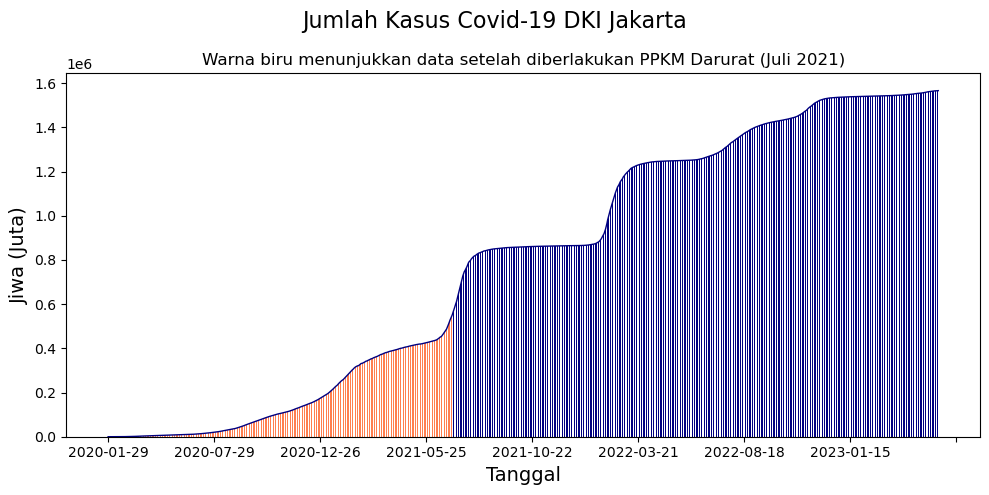

In [80]:
# Plot angka Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Kasus Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["positif"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "positif"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "positif"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa (Juta)", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

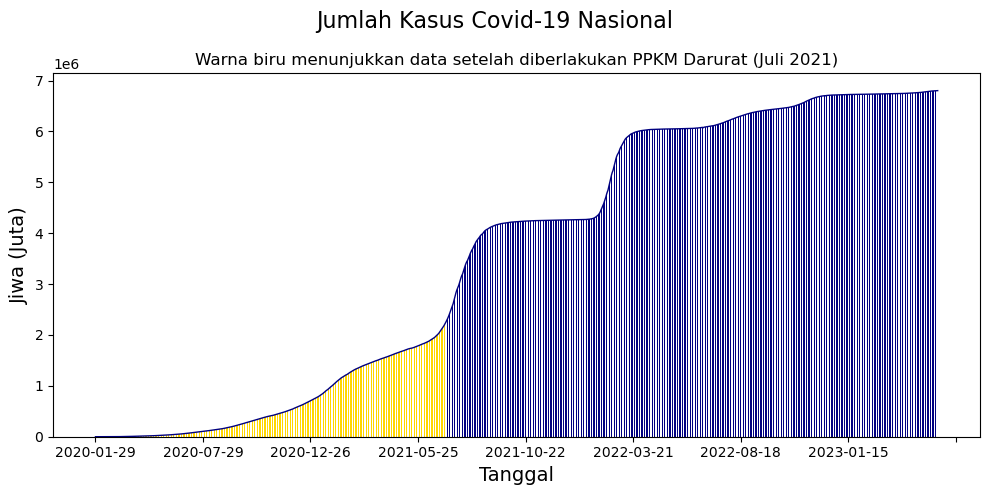

In [79]:
# Plot angka Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Kasus Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["positif"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "positif"].to_list(), 
        color="gold", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "positif"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa (Juta)", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

Pada plot di atas ditampilkan jumlah kasus Covid-19 di DKI Jakarta dan Nasional. Warna biru menunjukkan jumlah kasus setelah diberlakukannya kebijakan PPKM Darurat pada 3 Juli 2021. Terlihat bahwa setelah diberlakukannya PPKM Darurat, jumlah kasus Covid-19 di Jakarta maupun nasional malah meningkat tajam alih-alih menurun landai. Hingga bulan Oktober, grafik sedikit monoton hingga kembali naik tajam di awal tahun 2022. Hingga awal tahun 2023, grafik memiliki tren naik. 

Ini berarti PPKM Darurat yang diberlakukan tidak efektif dan tidak tepat diberlakukan tepat waktu dalam menekan kasus Covid-19. Maka, **hipotesis pertama ditolak**.

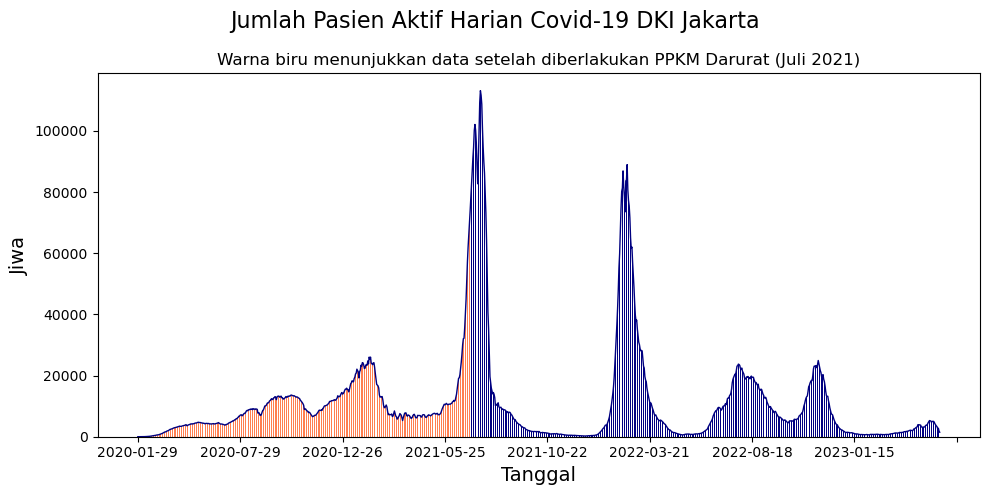

In [81]:
# Plot angka pasien aktif Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Pasien Aktif Harian Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["positif_aktif"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "positif_aktif"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "positif_aktif"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

Grafik jumlah pasien aktif harian Covid-19 di Jakarta membuktikan pertanyaan tersebut lebih jauh. Ketika PPKM Darurat diberlakukan, angka pasien aktif harian di Jakarta justru malah melambung naik. 

Selain itu, dapat diamati bahwa pada awal tahun 2022 terjadi kenaikan drastis yang diikuti dengan melonjaknya grafik pada jumlah kasus Covid-19 pada periode yang sama. Ini dapat disebabkan karena meningkatnya aktivitas masyarakat pada akhir tahun 2021 hingga awal tahun 2022, seperti perayaan natal dan tahun baru, yang tidak dibatasi. 

Lonjakan yang sama diamati pada akhir tahun 2022 hingga awal tahun 2023. Namun, pada periode ini lonjakan jumlah kasus tidak setinggi sebelumnya karena digencarkannya program vaksinasi pada tahun 2022.

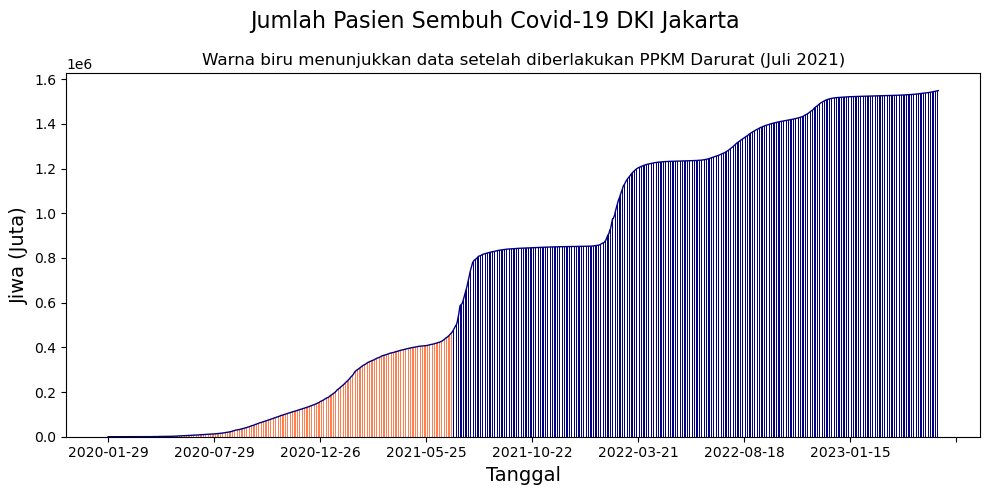

In [83]:
# Plot angka pasien sembuh Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Pasien Sembuh Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["sembuh"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "sembuh"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "sembuh"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa (Juta)", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

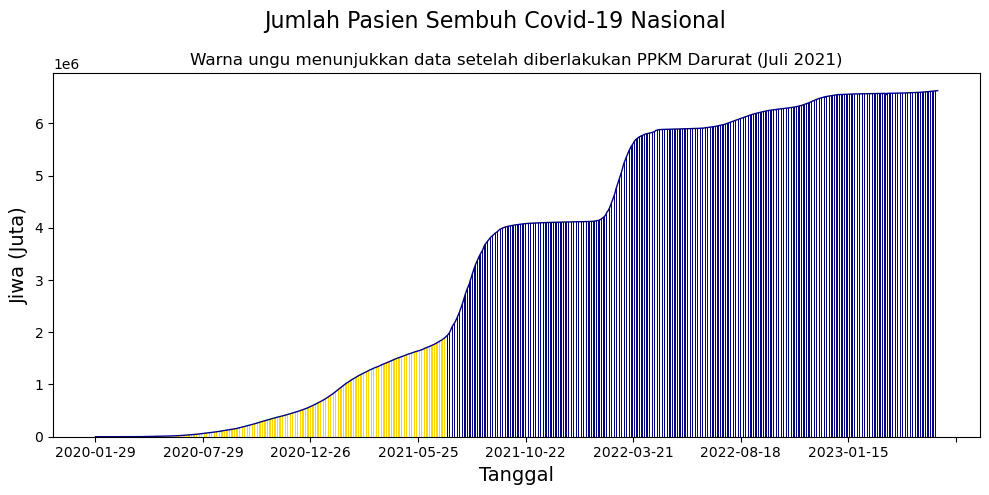

In [88]:
# Plot angka pasien sembuh Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Pasien Sembuh Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["sembuh"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "sembuh"].to_list(), 
        color="gold", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "sembuh"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna ungu menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa (Juta)", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

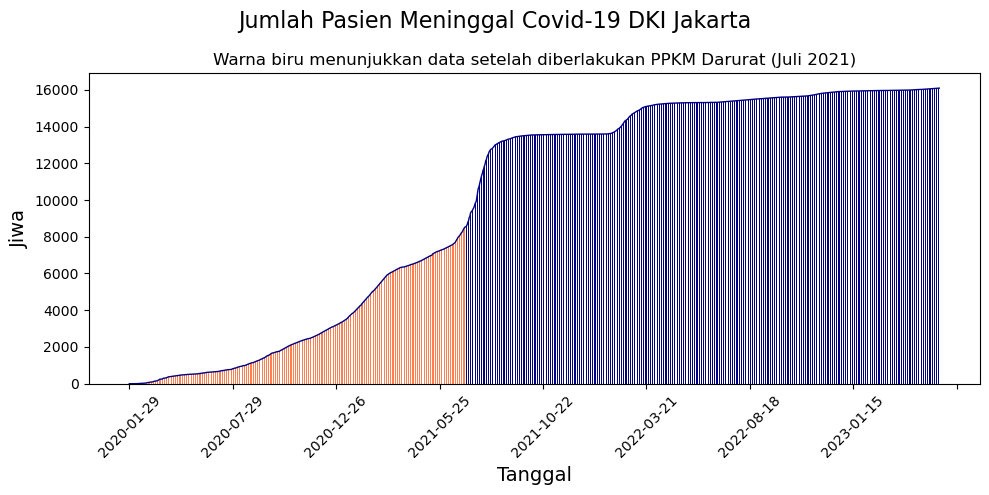

In [93]:
# Plot angka kematian Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Pasien Meninggal Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["meninggal"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "meninggal"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "meninggal"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

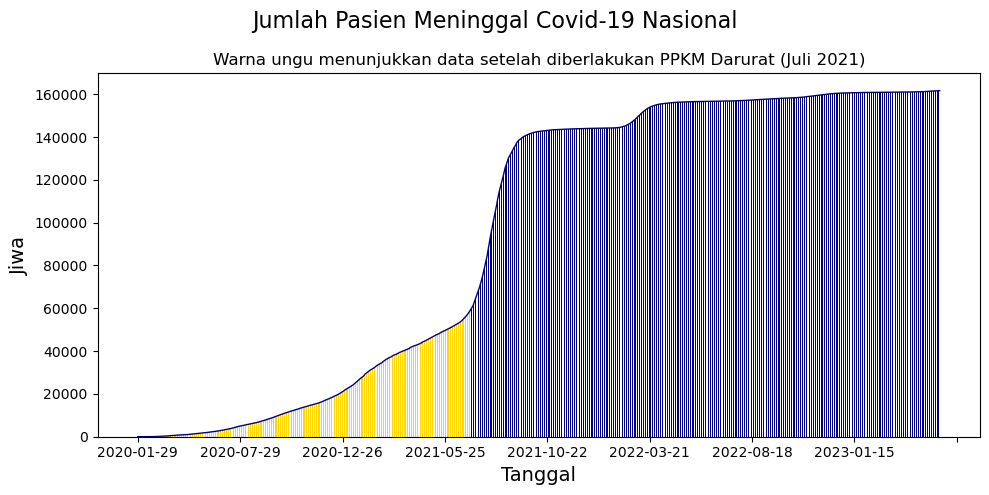

In [89]:
# Plot angka pasien meninggal Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Pasien Meninggal Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["meninggal"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "meninggal"].to_list(), 
        color="gold", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "meninggal"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna ungu menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

Jumlah pasien sembuh dan meninggal di Jakarta maupun nasional juga mengalami peningkatan setelah diberlakukannya PPKM Darurat. Kedua variabel ini dipengaruh oleh jumlah pasien Covid-19, sehingga grafiknya pun berbanding lurus dengan meningkatnya grafik jumlah pasien Covid-19.

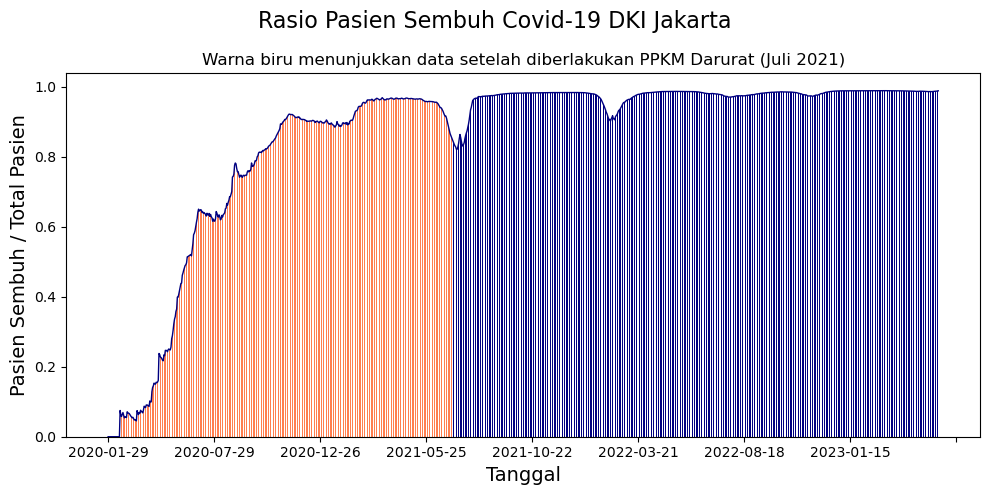

In [84]:
# Plot rasio pasien sembuh Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Rasio Pasien Sembuh Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["rasio_sembuh"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "rasio_sembuh"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "rasio_sembuh"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Pasien Sembuh / Total Pasien", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

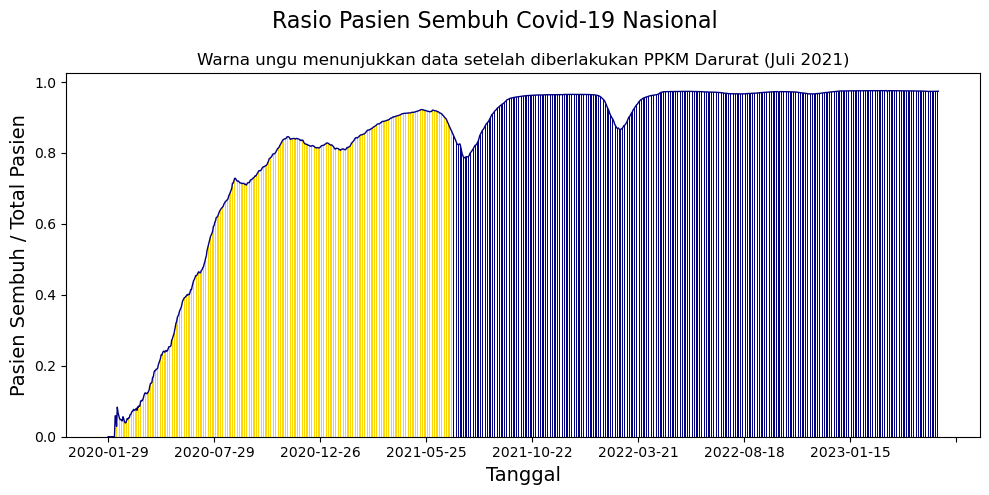

In [90]:
# Plot rasio pasien sembuh Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Rasio Pasien Sembuh Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["rasio_sembuh"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "rasio_sembuh"].to_list(), 
        color="gold", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "rasio_sembuh"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna ungu menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Pasien Sembuh / Total Pasien", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

Tidak efektifnya pemberlakuan PPKM Darurat juga ditunjukkan oleh grafik rasio pasien sembuh terhadap total pasien Covid-19 di Jakarta maupun nasional. Grafik ini mengalami penurunan setelah diberlakukannya PPKM Darurat karena adanya kenaikan jumlah pasien pada periode ini. Hal yang sama juga terjadi dengan adanya lonjakan kasus di akhir tahun 2021, grafik juga mengalami penurunan.

Grafik untuk DKI Jakarta sendiri mengalami sedikit kenaikan setelah periode pemberlakuan. Ini mungkin dipengaruhi oleh adanya pembatasan yang lebih ketat serta jumlah fasilitas kesehatan di Jakarta dibandingkan dengan keadaan nasional yang malah menurun.

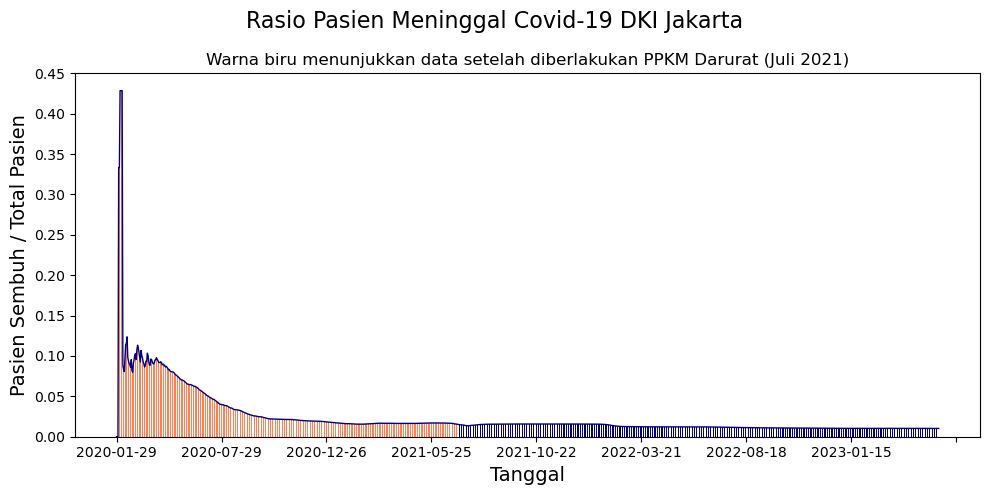

In [85]:
# Plot rasio pasien meninggal Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Rasio Pasien Meninggal Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["rasio_kematian"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "rasio_kematian"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "rasio_kematian"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Pasien Sembuh / Total Pasien", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

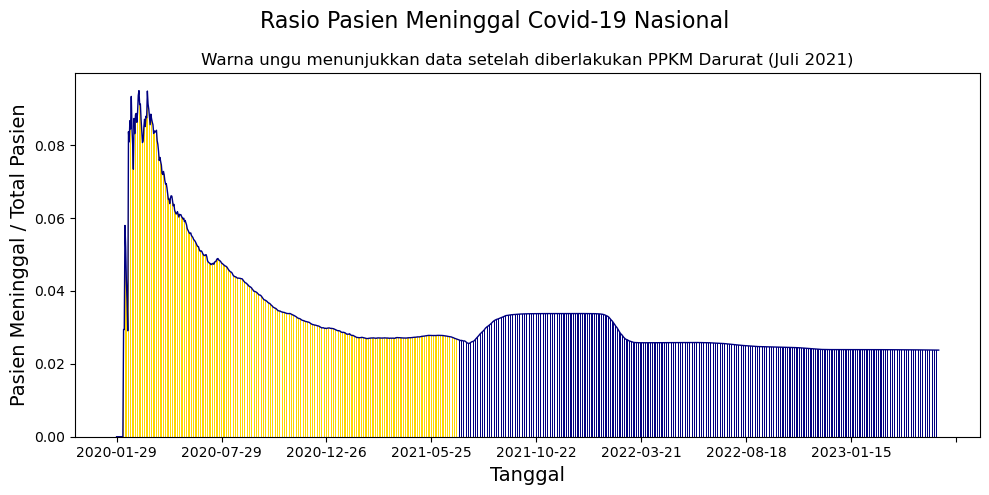

In [100]:
# Plot rasio pasien meninggal Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Rasio Pasien Meninggal Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["rasio_kematian"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "rasio_kematian"].to_list(), 
        color="gold", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "rasio_kematian"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna ungu menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Pasien Meninggal / Total Pasien", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

Pada grafik rasio pasien meninggal, tidak terdapat kenaikan berarti di DKI Jakarta setelah diberlakukannya PPKM Darurat. Akan tetapi, pada grafik nasional terjadi kenaikan drastis yang membuktikan lebih jauh tidak efektifnya kebijakan PPKM Darurat. Grafik ini juga mengalami penurunan pada akhir tahun 2021 dengan melonjaknya jumlah kasus Covid-19 nasional.

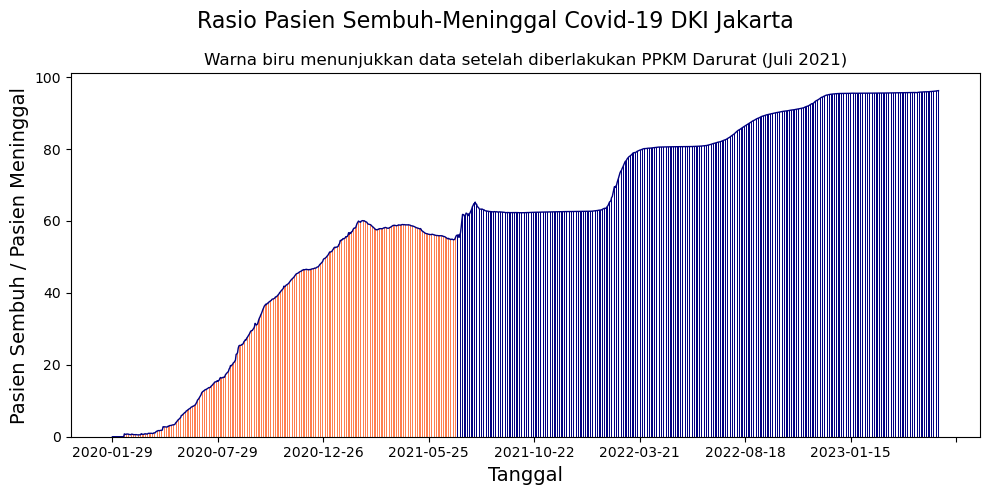

In [86]:
# Plot rasio pasien sembuh-meninggal Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Rasio Pasien Sembuh-Meninggal Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["rasio_sembuh_meninggal"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "rasio_sembuh_meninggal"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "rasio_sembuh_meninggal"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Pasien Sembuh / Pasien Meninggal", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

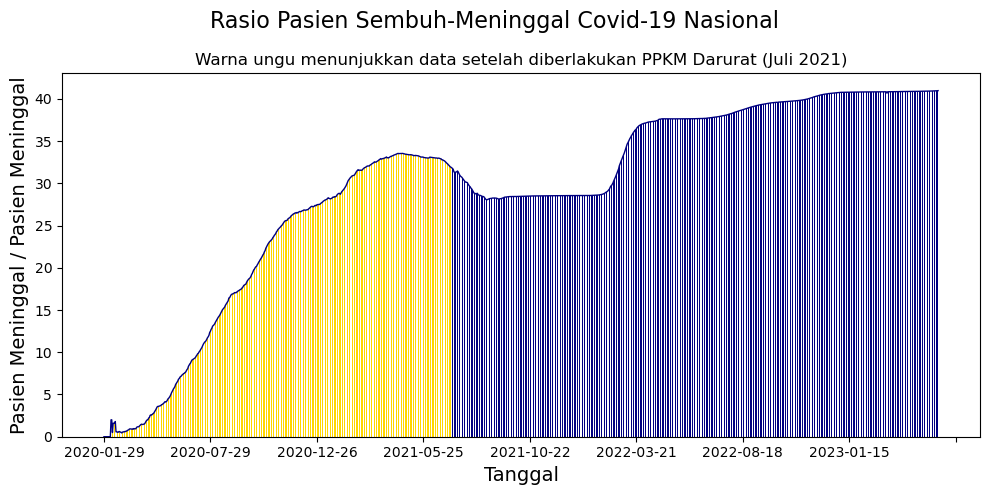

In [92]:
# Plot rasio pasien sembuh-meninggal Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Rasio Pasien Sembuh-Meninggal Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["rasio_sembuh_meninggal"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "rasio_sembuh_meninggal"].to_list(), 
        color="gold", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "rasio_sembuh_meninggal"].to_list(),
        color="navy", width=0.5)

ax.set_title("Warna ungu menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Pasien Meninggal / Pasien Meninggal", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

Pada grafik rasio pasien sembuh-meninggal nasional, terjadi penurunan setelah diberlakukannya PPKM Darurat. Kebijakan PPKM Darurat tidak efektif dan diberlakukan terlambat karena setelah diberlakukannya PPKM Darurat, secara nasional jumlah pasien meninggal justru meningkat lebih banyak dibanding jumlah pasien yang meninggal. Pada grafik Jakarta sendiri terjadi kenaikan, yang mungkin dapat dipengaruhi oleh upaya pembatasan yang lebih ketat.

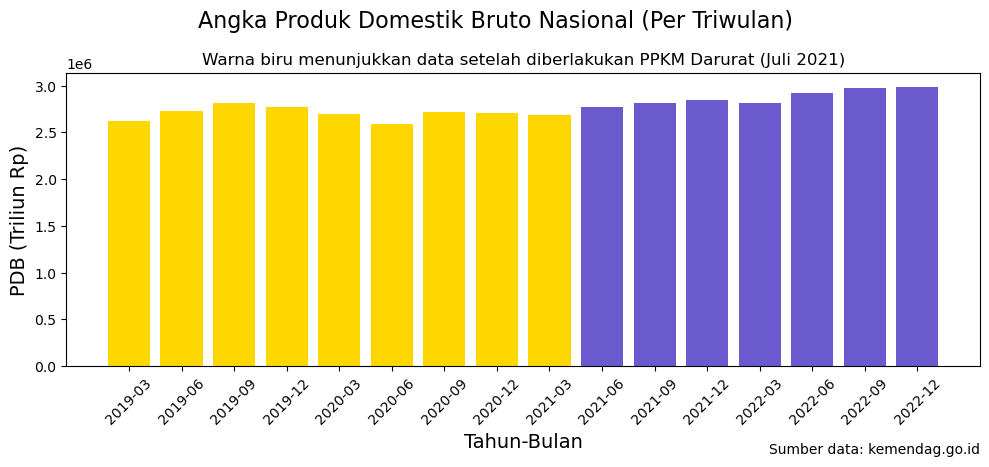

In [101]:
# Plot angka PDB 2019-2022
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Angka Produk Domestik Bruto Nasional (Per Triwulan)", fontsize=16, ha="center")

ax.bar(df_PDB.loc[df_PDB.index <= "2021-06"].index.to_list(), 
        df_PDB.loc[df_PDB.index <= "2021-06", "PDB_harga_konstan"].to_list(), 
        color="gold", 
        lw=2)

ax.bar(df_PDB.loc[df_PDB.index >= "2021-06"].index.to_list(), 
        df_PDB.loc[df_PDB.index >= "2021-06", "PDB_harga_konstan"].to_list(),
        color="slateblue",
        lw=2)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tahun-Bulan", fontsize=14)
ax.set_ylabel("PDB (Triliun Rp)", fontsize=14)
plt.text(1, -0.3, "Sumber data: kemendag.go.id",
        ha="right", transform=ax.transAxes)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

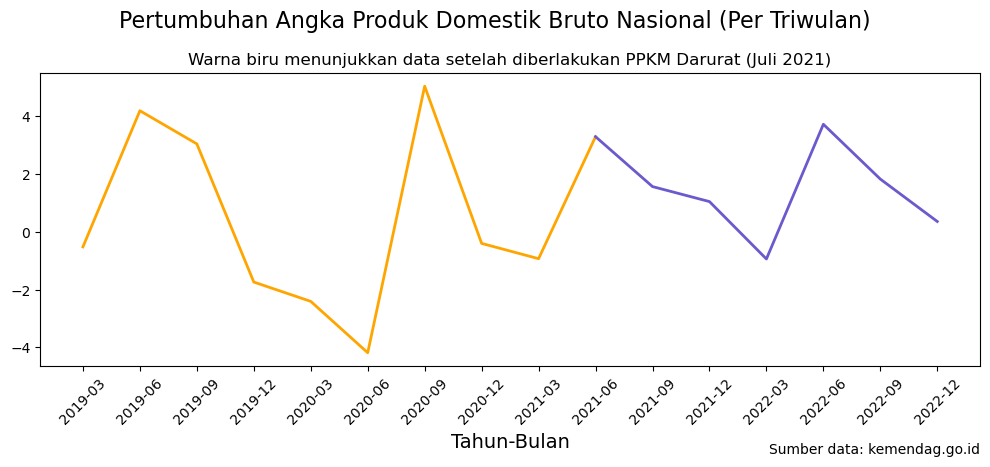

In [103]:
# Plot perkembangan PDB 2019-2022
# Plot angka PDB 2019-2022
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Pertumbuhan Angka Produk Domestik Bruto Nasional (Per Triwulan)", fontsize=16, ha='center')
ax.plot(df_PDB.loc[df_PDB.index <= "2021-06"].index.to_list(), 
        df_PDB.loc[df_PDB.index <= "2021-06", "perubahan_harga_konstan"].to_list(), 
        color="orange", 
        lw=2)

ax.plot(df_PDB.loc[df_PDB.index >= "2021-06"].index.to_list(), 
        df_PDB.loc[df_PDB.index >= "2021-06", "perubahan_harga_konstan"].to_list(),
        color="slateblue",
        lw=2)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha='center')
ax.set_xlabel("Tahun-Bulan", fontsize=14)
plt.text(1, -0.3, "Sumber data: kemendag.go.id",
        ha="right", transform=ax.transAxes)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Adapun grafik PDB nasional mengalami kenaikan sejak diberlakukannya PPKM Darurat yang mungkin dapat mengindikasikan pemberlakuan kebijakan tersebut berdampak positif pada pertumbuhannya. Akan tetapi, grafik pertumbuhannya sendiri mengalami penurunan hingga awal tahun 2022. Diberlakukannya PPKM Darurat menyebabkan terhentinya kegiatan ekonomi di berbagai sektor, sehingga terjadilah penurunan tersebut. Oleh karena itu, **hipotesis kedua diterima**.

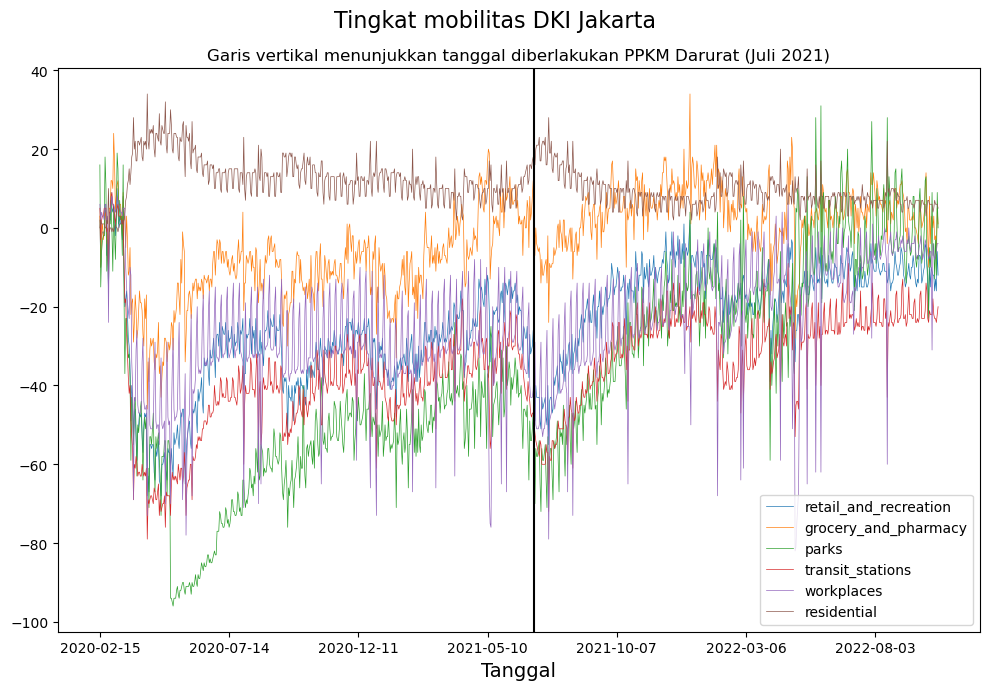

In [37]:
# Plot tingkat mobilitas Jakarta
fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle("Tingkat mobilitas DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_mobility_jakarta.index, 
        df_mobility_jakarta, lw=0.5,
        label=df_mobility_jakarta.columns)

ax.axvline(x="2021-07-03", color="k")
ax.set_title("Garis vertikal menunjukkan tanggal diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.legend()
plt.tight_layout()
plt.show()

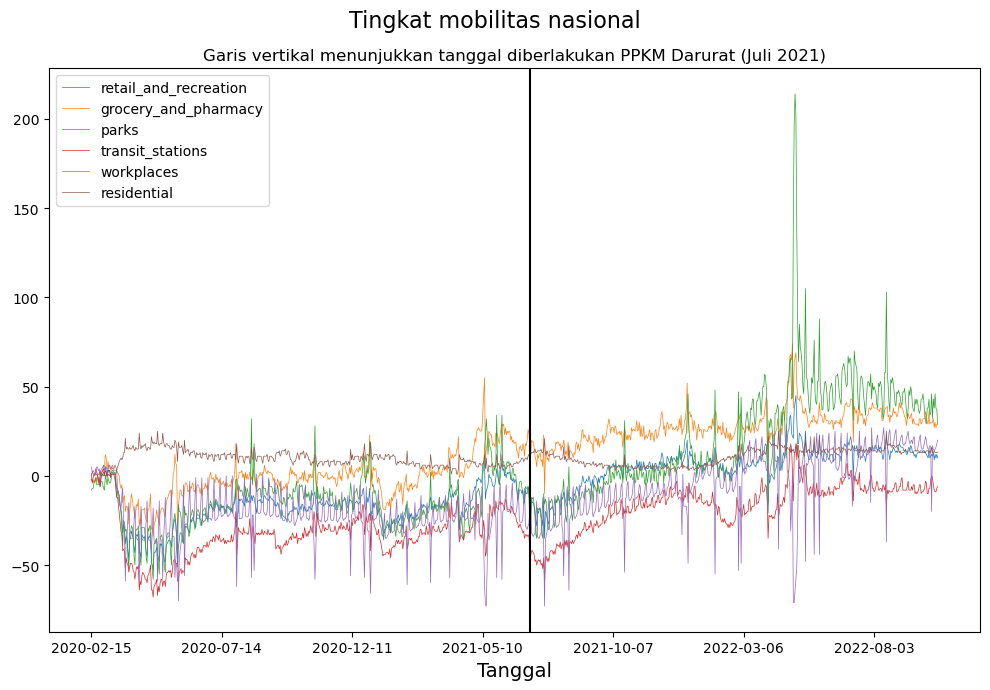

In [1260]:
# Plot tingkat mobilitas nasional
fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle("Tingkat mobilitas nasional", fontsize=16, ha='center')
ax.plot(df_mobility_nasional.index, 
        df_mobility_nasional, lw=0.5, 
        label=df_mobility_nasional.columns)
ax.axvline(x="2021-07-03", color="k")
ax.set_title("Garis vertikal menunjukkan tanggal diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.legend()
plt.tight_layout()
plt.show()

Selain itu, pemberlakuan PPKM Darurat juga berdampak negatif pada tingkat mobilitas masyarakat di DKI Jakarta maupun nasional. Grafik tingkat mobilitas masyarakat berada pada minimum sejak diberlakukannya PPKM Darurat. Oleh karena itu, **hipotesis ketiga diterima**.

Adapun secara nasional, mobilitas masyarakat di kategori perumahan tidak mengalami banyak perubahan karena diberlakukannya pembatasan aktivitas sejak awal pandemi. Pada grafik Jakarta sendiri kategori ini mengalami peningkatan menjelang diberlakukannya PPKM Darurat. Ini dapat menjelaskan melonjaknya jumlah kasus Covid-19 di Jakarta pada awal pemberlakuan PPKM Darurat.

# **Feature Engineering**

Model regresi data Covid-19 Jakarta dan nasional dapat digunakan untuk memprediksi jumlah kasus Covid-19. Untuk memodelkan data, *dataframe* perlu dinormalisasi terlebih dahulu karena terdapat data-data dengan *range* yang jauh berbeda, yaitu antara ribuan dengan jutaan. Jika tidak dinormalisasi terlebih dahulu, hasil regresi hanya akan dipengaruhi variabel dengan *range* besar dan model yang dihasilkan akan kurang akurat.

Normalisasi dilakukan dengan metode *min-max scaler*.

In [40]:
# Normalisasi data Covid-19 Jakarta dengan Min-Max scaler
# Pisahkan kolom tanggal dari dataset
df_jakarta_norm = df_covid_jakarta.reset_index().copy()
tanggal = df_jakarta_norm["tanggal"]
df_jakarta_norm = df_jakarta_norm.drop(columns="tanggal")

# Inisiasi Min-Max scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

# Transformasi Min-Max scaler
data = min_max_scaler.fit_transform(df_jakarta_norm.values)
df_jakarta_norm = pd.DataFrame(data, columns=df_jakarta_norm.columns)

# Insert kolom tanggal dan set menjadi index
df_jakarta_norm.insert(loc=0, column="tanggal", value=tanggal)
df_jakarta_norm = df_jakarta_norm.set_index("tanggal")
print("Normalized dataset :")
df_jakarta_norm.head()

Normalized dataset :


,meninggal,sembuh,positif,positif_aktif,rasio_kematian,rasio_sembuh,rasio_sembuh_meninggal
tanggal,,,,,,,
2020-01-29,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
2020-03-01,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
2020-03-02,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
2020-03-03,0.000062,0.0,0.000002,0.000018,0.777778,0.0,0.0
2020-03-04,0.000062,0.0,0.000002,0.000018,0.777778,0.0,0.0


In [41]:
# Normalisasi data Covid-19 nasional dengan Min-Max scaler
# Pisahkan kolom tanggal dari dataset
df_nasional_norm = df_covid_nasional.reset_index().copy()
tanggal = df_nasional_norm["tanggal"]
df_nasional_norm = df_nasional_norm.drop(columns="tanggal")

# Inisiasi Min-Max scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

# Transformasi Min-Max scaler
data = min_max_scaler.fit_transform(df_nasional_norm.values)
df_nasional_norm = pd.DataFrame(data, columns=df_nasional_norm.columns)

# Insert kolom tanggal dan set menjadi index
df_nasional_norm.insert(loc=0, column="tanggal", value=tanggal)
df_nasional_norm = df_nasional_norm.set_index("tanggal")
print("Normalized dataset :")
df_nasional_norm.head()

Normalized dataset :


,positif,sembuh,meninggal,rasio_kematian,rasio_sembuh,rasio_sembuh_meninggal
tanggal,,,,,,
2020-01-29,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-03-01,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-03-02,2.940090e-07,0.0,0.0,0.0,0.0,0.0
2020-03-03,2.940090e-07,0.0,0.0,0.0,0.0,0.0
2020-03-04,2.940090e-07,0.0,0.0,0.0,0.0,0.0


# **Analisis Lanjutan**

Model regresi polinomial dapat dibuat untuk melakukan prediksi pada jumlah kasus Covid-19 di Jakarta maupun nasional. Untuk melatih model, dilakukan *train-test split* pada data. Untuk mendapatkan orde polinomial yang cocok dengan data, dilakukan *grid search* menggunakan *mean-squared error* terhadap data. Orde polinomial kemudian ditentukan dengan parameter best_params_ sebagai ordenya. Selanjutnya, model di-*fit* terhadap data serta dicetak plot dan *score* regresinya.

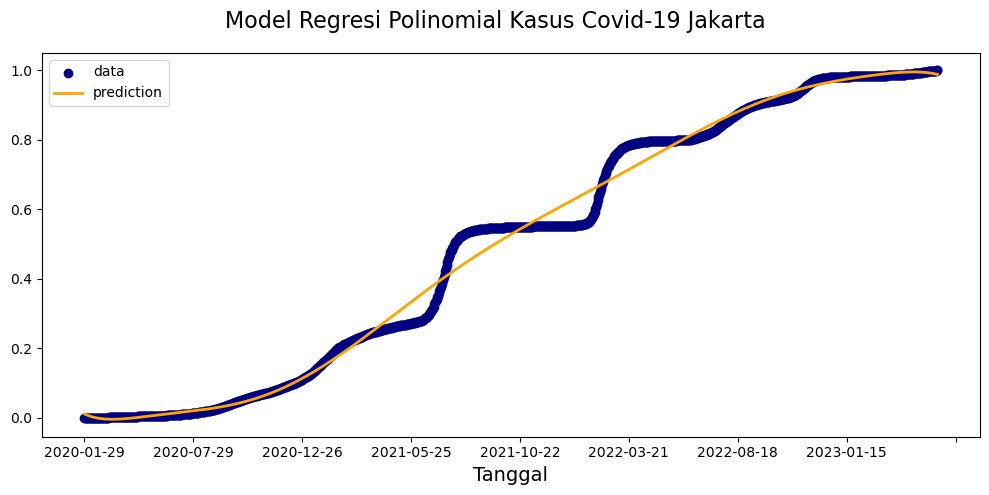

Regression score:  0.8507633283223799


In [73]:
# Model regresi polinomial data Covid-19 Jakarta 
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
from scipy.linalg import LinAlgWarning
warnings.filterwarnings(action='ignore', category=LinAlgWarning, module='sklearn')
warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn')

# Reshape data
x_list = [i for i in range (len(df_jakarta_norm))]
x = np.array(x_list).reshape(-1, 1)
y = np.array(df_jakarta_norm['positif']).reshape(-1, 1)

# Train-test split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Hyperparameter tuning untuk mencari orde polinomial menggunakan grid search
param_grid = [{'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train.reshape(-1, 1), y_train)

# Orde polinomial
order = str(grid_search.best_params_)

# Model regresi polinomial
model = make_pipeline(PolynomialFeatures(int(order[-2])), Ridge(normalize=True))
model.fit(x_train, y_train)
y_hat = grid_search.predict(x)

# Plot regresi
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Model Regresi Polinomial Kasus Covid-19 Jakarta", fontsize=16, ha="center")
ax.scatter(df_jakarta_norm.index, y, color="navy", label="data")
ax.plot(df_jakarta_norm.index, y_hat, color="orange", lw=2, label="prediction")
ax.legend(loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel("Tanggal", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# Cetak score regresi
print("Regression score: ", model.score(x, y_hat))

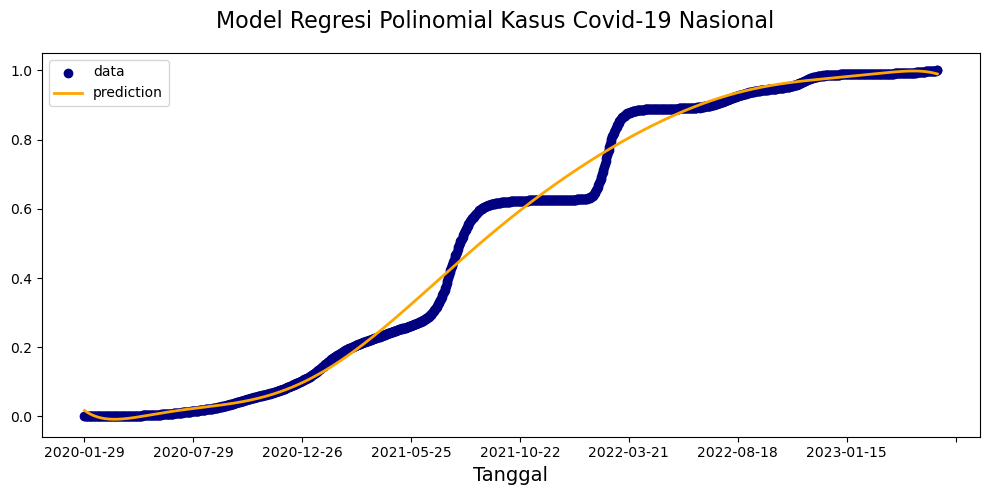

Regression score:  0.8223272593877676


In [72]:
# Model regresi polinomial data Covid-19 nasional 
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
from scipy.linalg import LinAlgWarning
warnings.filterwarnings(action='ignore', category=LinAlgWarning, module='sklearn')
warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn')

# Reshape data
x_list = [i for i in range (len(df_nasional_norm))]
x = np.array(x_list).reshape(-1, 1)
y = np.array(df_nasional_norm['positif']).reshape(-1, 1)

# Train-test split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Hyperparameter tuning untuk mencari orde polinomial menggunakan grid search
param_grid = [{'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train.reshape(-1, 1), y_train)

# Orde polinomial
order = str(grid_search.best_params_)

# Model regresi polinomial
model = make_pipeline(PolynomialFeatures(int(order[-2])), Ridge(normalize=True))
model.fit(x_train, y_train)
y_hat = grid_search.predict(x)

# Plot regresi
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Model Regresi Polinomial Kasus Covid-19 Nasional", fontsize=16, ha="center")
ax.scatter(df_nasional_norm.index, y, color="navy", label="data")
ax.plot(df_nasional_norm.index, y_hat, color="orange", lw=2, label="prediction")
ax.legend(loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel("Tanggal", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# Cetak score regresi
print("Regression score: ", model.score(x, y_hat))

Didapatkan *regression score* yang baik untuk kedua model. Oleh karena itu, model regresi polinomial ini dapat digunakan untuk prediksi jumlah kasus Covid-19 di Jakarta maupun nasional. 

In [98]:
# Export dataframe ke csv
df_covid_jakarta.to_csv("./export-dataset/data-covid-jakarta.csv", encoding="utf-8")
df_covid_nasional.to_csv("./export-dataset/data-covid-nasional.csv", encoding="utf-8")
df_PDB.to_csv("./export-dataset/data-PDB.csv", encoding="utf-8")
df_mobility_jakarta.to_csv("./export-dataset/data-mobility-jakarta.csv", encoding="utf-8")
df_mobility_nasional.to_csv("./export-dataset/data-mobility-nasional.csv", encoding="utf-8")

# **Kesimpulan dan Rekomendasi**

Dari analisis data yang telah dilakukan dapat disimpulkan beberapa hal sebagai berikut.

1.   Kebijakan PPKM Darurat yang diberlakukan oleh pemerintah tidak efektif dan diberlakukan terlambat sehingga tidak mampu menekan angka kasus Covid-19.
2.   Kebijakan PPKM Darurat memiliki efek negatif terhadap pertumbuhan PDB nasional yang ditandai dengan angka pertumbuhan PDB nasional yang bernilai negatif setelah diberlakukannya kebijakan tersebut.
3.   Kebijakan PPKM Darurat memiliki efek negatif terhadap tingkat mobilitas masyarakat secara nasional. 

Selain itu, berikut adalah beberapa langkah rekomendasi dari analisis data yang telah dilakukan.

1.   Agar dapat menekan angka kasus Covid-19 secara efektif, kebijakan PPKM Darurat harusnya diberlakukan lebih awal saat pandemi dimulai.
2.   Kebijakan pembatasan aktivitas saat pandemi harus lebih ketat dalam pelaksanaannya agar tidak terjadi kenaikan kasus pada kegiatan seperti perayaan hari natal dan tahun baru 2022.
3.   Mobilitas masyarakat yang terhambat saat pandemi berpengaruh pada tingkat kesejahteraan masyarakat, sehingga pemerintah harus 